In [1]:
# ##### setting
# ### set filename you want to analysis
# filepath = None

# if filepath == None:
#     import os
#     import smooziee
#     filepath = os.path.join(os.path.dirname(smooziee.__file__), 'data', 'PbTe_sq_GX711_p0p25_RT_4')
    
# filename = os.path.basename(filepath)


In [2]:
##### import
# from smooziee.smooziee.fitting import Fitting
# from smooziee.smooziee.peak_search import PeakSearch
from smooziee.smooziee import fitting
from smooziee.smooziee import peak_search
import imp
imp.reload(fitting)
imp.reload(peak_search)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lmfit


In [3]:
import pickle
# with open('/home/kondo/data/ixs_phonon/data/PbTe_sq_GL711_p0p55_RT_1.pkl', 'rb') as f:
#     processor = pickle.load(f) 

pkl_path = '../data/PbTe_sq_GL711_p0p55_RT_1.pkl'
processor = peak_search.read_peaksearch(pkl_path)
n_peaks = len(processor.ix_peaks)

print(processor.x.shape)
print(processor.y.shape)
print(processor.ix_peaks)
print(processor.ix_peakpairs)

(71,)
(71,)
[0, 7, 11, 18, 25, 30, 36, 41, 46]
[[7, 30], [11, 25]]


In [4]:
# class PeakSearch():
#     def __init__(self, x, ix_peaks, ix_peakpairs):
#         self.x = x
#         self.ix_peaks = ix_peaks
#         self.ix_peakpairs = ix_peakpairs

# peaksearch = PeakSearch(processor.x,
#                         processor.ix_peaks,
#                         processor.ix_peak_pairs)


fit = fitting.Fitting(pkl_path, ['lorentzian' for i in range(n_peaks)])


In [5]:
fit.set_params_vary(range(n_peaks), ['center'], vary=False)

In [6]:
fit.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude         1    1e-08      inf     None     True     None     None
l0_center        -10.5     -inf      inf     None    False     None     None
l0_fwhm              2     -inf      inf     None    False 2.0000000*l0_sigma     None
l0_height       0.3183     -inf      inf     None    False 0.3183099*l0_amplitude/max(1.e-15, l0_sigma)     None
l0_sigma             1    1e-08      inf     None     True     None     None
l1_amplitude         1    1e-08      inf     None     True     None     None
l1_center           -7     -inf      inf     None    False     None     None
l1_fwhm              2     -inf      inf     None    False 2.0000000*l1_sigma     None
l1_height       0.3183     -inf      inf     None    False 0.3183099*l1_amplitude/max(1.e-15, l1_sigma)     None
l1_sigma             1    1e-08      inf     None     True     None     None
l2_amplitude         1    1e-08      inf     None     True 

In [7]:
fit.fit(processor.x, processor.y, set_bestparams=True)

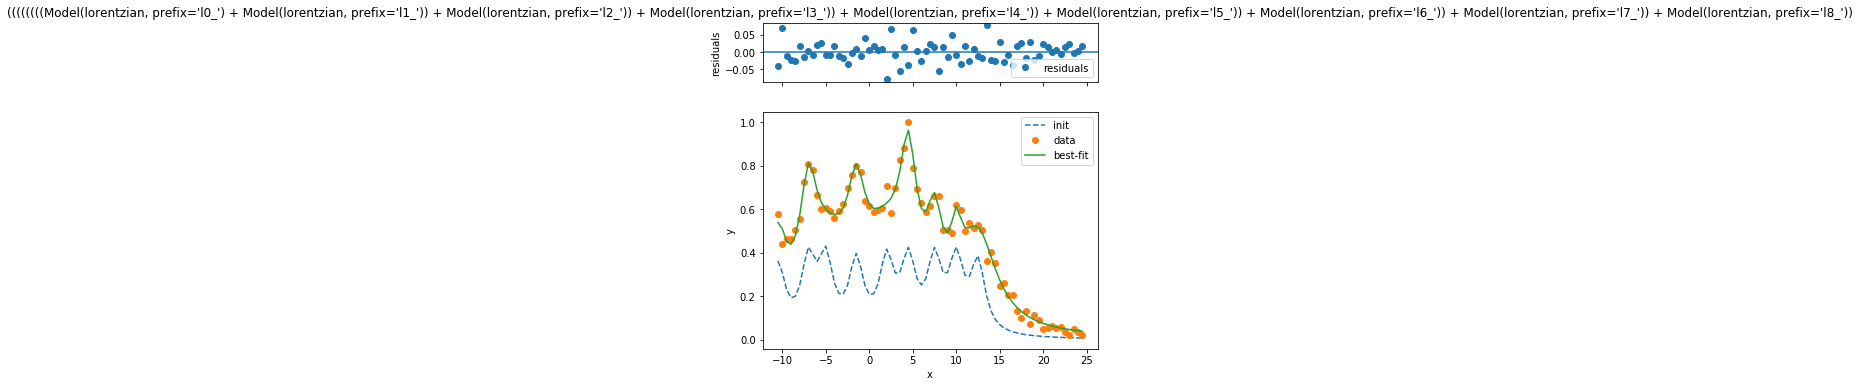

In [8]:
fit.plot(show_init=True)

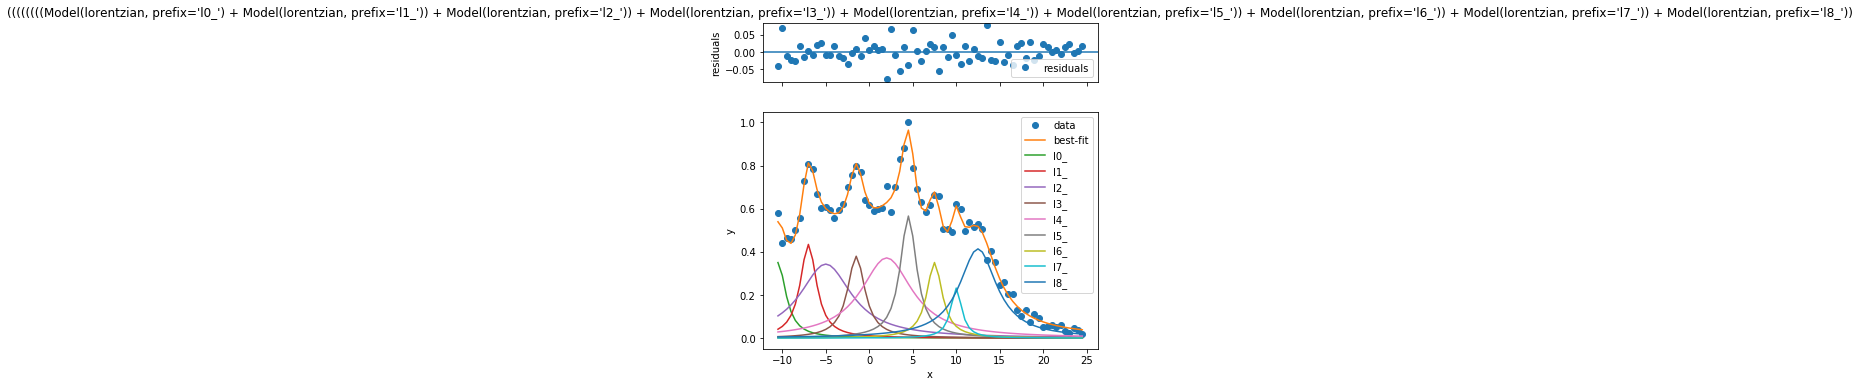

In [9]:
fit.plot_evalcomponents()

In [10]:
fit.set_params_vary(None, None, vary=True, all_param=True,
                    onlyif_expr_isNone=True)

In [11]:
fit.result.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude     1.214    1e-08      inf   0.4031     True     None     None
l0_center        -10.5     -inf      inf        0     True     None     None
l0_fwhm          2.208     -inf      inf   0.5535    False 2.0000000*l0_sigma     None
l0_height       0.3501     -inf      inf  0.04921    False 0.3183099*l0_amplitude/max(1.e-15, l0_sigma)     None
l0_sigma         1.104    1e-08      inf   0.2767     True     None     None
l1_amplitude     1.544    1e-08      inf   0.3118     True     None     None
l1_center           -7     -inf      inf        0     True     None     None
l1_fwhm          2.264     -inf      inf   0.2515    False 2.0000000*l1_sigma     None
l1_height       0.4343     -inf      inf  0.05341    False 0.3183099*l1_amplitude/max(1.e-15, l1_sigma)     None
l1_sigma         1.132    1e-08      inf   0.1257     True     None     None
l2_amplitude      3.88    1e-08      inf    1.274     True 

In [12]:
fit.fit(processor.x, processor.y, set_bestparams=True)

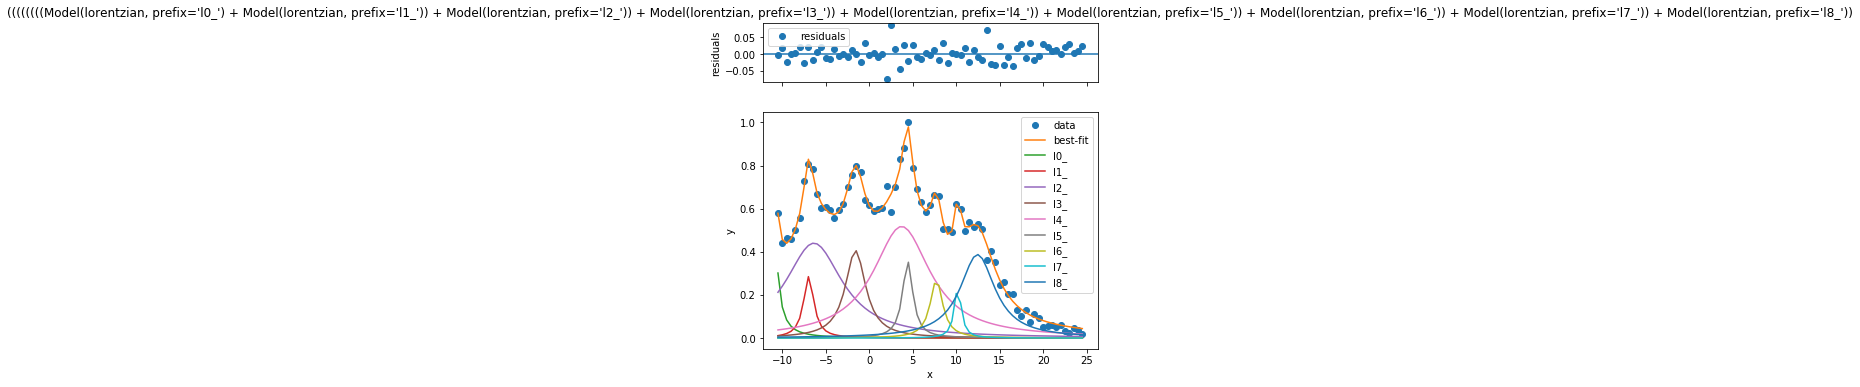

In [13]:
fit.plot_evalcomponents()

In [14]:
fit.set_params_vary(None, None, vary=True, all_param=True,
                    onlyif_expr_isNone=False)

In [15]:
fit.fit(processor.x, processor.y, set_bestparams=True)

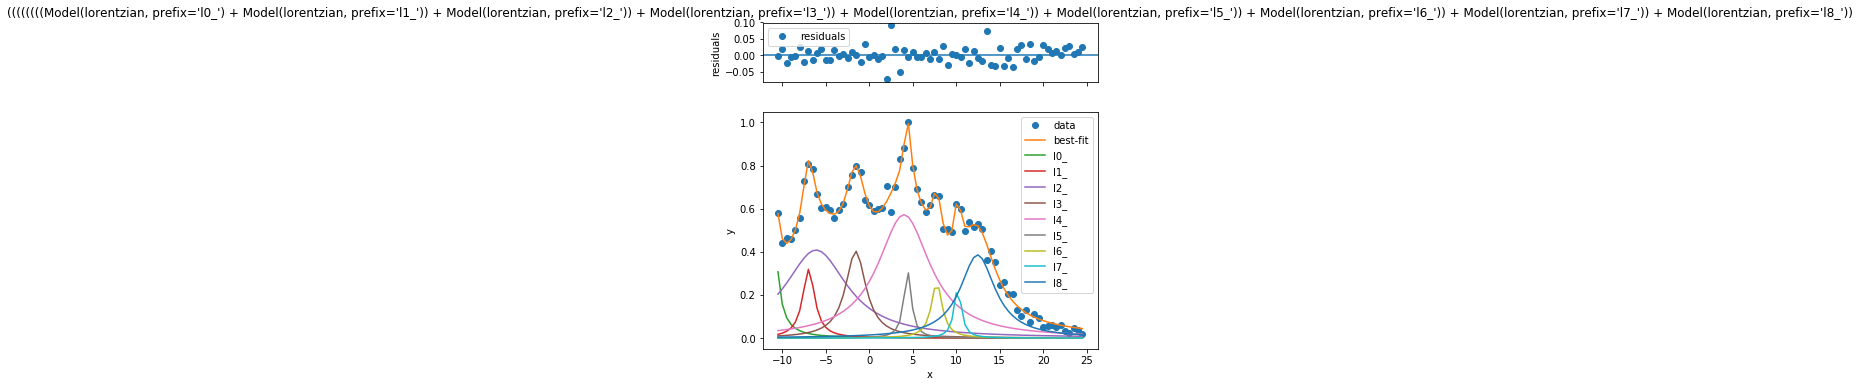

In [16]:
fit.plot_evalcomponents()

In [17]:
fit.result.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude     48.92    1e-08      inf     None     True     None     None
l0_center       -11.75     -inf      inf     None     True     None     None
l0_fwhm        0.06331     -inf      inf     None     True     None     None
l0_height        376.8     -inf      inf     None     True     None     None
l0_sigma       0.03065    1e-08      inf     None     True     None     None
l1_amplitude    0.8421    1e-08      inf     None     True     None     None
l1_center       -6.965     -inf      inf     None     True     None     None
l1_fwhm          1.427     -inf      inf     None     True     None     None
l1_height       0.2855     -inf      inf     None     True     None     None
l1_sigma        0.8395    1e-08      inf     None     True     None     None
l2_amplitude     5.604    1e-08      inf     None     True     None     None
l2_center       -6.114     -inf      inf     None     True     None     No